# This notebook goes with Lesson 9, Section 15 of the Tensorflow course on Udacity. It improves the NLP model from earlier sections.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P \
    -O /tmp/sentiment.csv

--2020-11-27 21:15:40--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 216.58.194.206, 2607:f8b0:4005:805::200e
Connecting to drive.google.com (drive.google.com)|216.58.194.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p365b3tmukfalok8iu5jopkck9ace4bc/1606511700000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2020-11-27 21:15:41--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p365b3tmukfalok8iu5jopkck9ace4bc/1606511700000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 142.250.72.193, 2607:f8b0:4005:801::2001
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|142.250.72.193|

In [3]:
import numpy as np
import pandas as pd

In [4]:
dataset = pd.read_csv('/tmp/sentiment.csv')

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

training_size = int(len(sentences)*0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [5]:
training_labels_final = np.array(training_labels)
test_labels_final = np.array(testing_labels)

# Tokenize

In [6]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'

In [15]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                               padding = padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                             padding = padding_type, truncating = trunc_type)

# Train Model

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [18]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, 
                    epochs=num_epochs, validation_data=(testing_padded, test_labels_final))

Epoch 1/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5116 - val_loss: 0.6951 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5223 - val_loss: 0.6968 - val_accuracy: 0.4110
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5436 - val_loss: 0.6974 - val_accuracy: 0.4135
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5336 - val_loss: 0.6906 - val_accuracy: 0.4737
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5712 - val_loss: 0.6828 - val_accuracy: 0.5514
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6384 - val_loss: 0.6762 - val_accuracy: 0.5464
Epoch 7/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6685 - val_loss: 0.6671 - val_accuracy: 0.5589
Epoch 8/30
50/50 [==

# Check the Training Graph

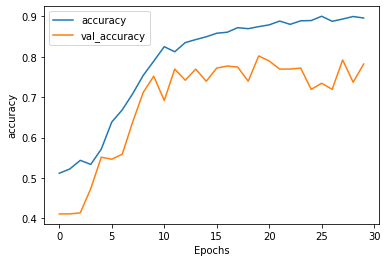

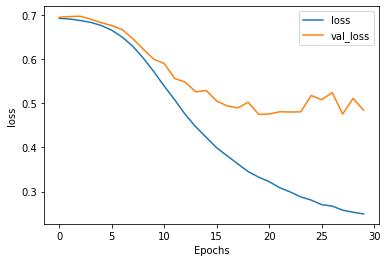

In [20]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
plt.show()

# Predict Sentiment of New Reviews

In [21]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.90311754]


I hate spaghetti
[0.11006495]


Everything was cold
[0.5193605]


Everything was hot exactly as I wanted
[0.34576875]


Everything was green
[0.5193605]


the host seated us immediately
[0.50593793]


they gave us free chocolate cake
[0.8365828]


not sure about the wilted flowers on the table
[0.05846471]


only works when I stand on tippy toes
[0.84007645]


does not work when I stand on my head
[0.0243879]


